In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data = pd.read_csv('/kaggle/input/bristol-airbnb/listings.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bristol-airbnb/listings.csv


In [2]:
# Calculate the percentage of missing values for each column
missing_data_percentage = data.isnull().mean() * 100

# Display columns with more than 20% missing values
columns_with_high_missing_values = missing_data_percentage[missing_data_percentage > 20]
columns_with_high_missing_values


neighborhood_overview            34.306569
host_about                       40.961786
host_neighbourhood               95.062258
neighbourhood                    34.306569
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
calendar_updated                100.000000
license                         100.000000
dtype: float64

In [3]:
# Drop columns with 100% missing values
data.drop(columns=columns_with_high_missing_values[columns_with_high_missing_values == 100].index, inplace=True)

# For the 'host_is_superhost' column, replace missing values with the mode (most frequent value)
data['host_is_superhost'].fillna(data['host_is_superhost'].mode()[0], inplace=True)

# For the 'bedrooms' column, replace missing values with the median value
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)

In [4]:
remaining_missing_data_percentage = data.isnull().mean() * 100
remaining_columns_with_missing_values = remaining_missing_data_percentage[remaining_missing_data_percentage > 0]
remaining_columns_with_missing_values

description                     0.944611
neighborhood_overview          34.306569
host_location                  17.647059
host_about                     40.961786
host_response_time             13.568055
host_response_rate             13.568055
host_acceptance_rate            5.968227
host_neighbourhood             95.062258
neighbourhood                  34.306569
bathrooms_text                  0.042937
beds                            2.318592
first_review                   14.641477
last_review                    14.641477
review_scores_rating           14.641477
review_scores_accuracy         14.813225
review_scores_cleanliness      14.813225
review_scores_checkin          14.813225
review_scores_communication    14.813225
review_scores_location         14.813225
review_scores_value            14.813225
reviews_per_month              14.641477
dtype: float64

In [5]:
columns_to_drop = ['description', 'neighborhood_overview', 'host_about', 'host_location', 
                   'neighbourhood', 'bathrooms_text', 'host_neighbourhood']
data.drop(columns=columns_to_drop, inplace=True)

In [6]:
columns_fill_median = ['beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                       'review_scores_value', 'reviews_per_month']
for col in columns_fill_median:
    data[col].fillna(data[col].median(), inplace=True)

In [7]:
columns_fill_mode = ['host_response_time', 'host_response_rate', 'host_acceptance_rate']
for col in columns_fill_mode:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [8]:
remaining_missing_data_percentage = data.isnull().mean() * 100
remaining_columns_with_missing_values = remaining_missing_data_percentage[remaining_missing_data_percentage > 0]
remaining_columns_with_missing_values

first_review    14.641477
last_review     14.641477
dtype: float64

In [9]:
# Drop the 'first_review' and 'last_review' columns
data.drop(columns=['first_review', 'last_review'], inplace=True)

# Convert 'host_is_superhost' and 'instant_bookable' columns from 't'/'f' to 1/0
data['host_is_superhost'] = data['host_is_superhost'].map({'t': 1, 'f': 0})
data['instant_bookable'] = data['instant_bookable'].map({'t': 1, 'f': 0})

# Convert 'host_response_rate' and 'host_acceptance_rate' to numerical values (by removing the % sign and converting to float)
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float') / 100.0
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

# Display the data types of the columns to ensure everything is in order
data.dtypes


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 62, dtype: object

In [10]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# Display non-numeric columns to decide which ones to drop
non_numeric_columns


Index(['listing_url', 'last_scraped', 'source', 'name', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_response_time',
       'host_thumbnail_url', 'host_picture_url', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities',
       'price', 'has_availability', 'calendar_last_scraped'],
      dtype='object')

In [11]:
# Drop non-relevant columns
columns_to_drop = ['listing_url', 'source', 'name', 'picture_url', 'host_url', 'host_name', 
                   'host_thumbnail_url', 'host_picture_url', 'host_response_time', 'host_verifications', 
                   'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities', 'last_scraped', 
                   'host_since', 'calendar_last_scraped']
data.drop(columns=columns_to_drop, inplace=True)

# Convert 't'/'f' columns to 1/0
columns_tf_to_10 = ['host_has_profile_pic', 'host_identity_verified', 'has_availability']
for col in columns_tf_to_10:
    data[col] = data[col].map({'t': 1, 'f': 0})

# Convert 'price' column to numeric
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Display the data to ensure changes are reflected
data.head()


,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,70820,20230328184415,360195,1.0,0.90,1,5,8,1,1,...,4.95,4.94,4.75,4.77,0,5,0,5,0,1.56
1,117122,20230328184415,591555,1.0,1.00,1,2,2,1,1,...,5.00,4.99,4.97,4.88,0,1,0,1,0,1.21
2,176306,20230328184415,708175,1.0,0.58,0,2,2,1,1,...,5.00,4.93,4.74,4.70,0,1,0,1,0,0.37
3,307634,20230328184415,1582810,1.0,0.92,1,3,3,1,1,...,4.93,4.76,4.79,4.62,0,3,1,2,0,0.45
4,341227,20230328184415,237360,1.0,1.00,1,1,10,1,1,...,4.96,4.96,4.83,4.73,0,1,1,0,0,0.82


In [12]:
# Compute the Pearson correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
correlation_matrix


,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.312390,-0.027224,0.004557,-0.212063,0.168420,0.161097,-0.089917,-0.122677,...,0.003516,0.028672,-0.025214,0.008918,0.126967,-0.027285,-0.067713,0.148895,-0.001094,0.003626
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.312390,NaN,1.000000,-0.030960,0.150473,-0.055358,-0.003858,-0.002544,-0.165307,-0.150057,...,-0.106577,-0.110908,-0.050811,-0.100636,0.230586,-0.115361,-0.109084,-0.029576,-0.026792,0.084265
host_response_rate,-0.027224,NaN,-0.030960,1.000000,0.328345,0.130649,0.032752,0.032478,0.081724,0.046353,...,0.045286,0.040834,0.052458,0.016968,0.043498,0.073932,0.069059,0.029092,-0.039912,0.097302
host_acceptance_rate,0.004557,NaN,0.150473,0.328345,1.000000,0.153632,-0.092169,-0.086372,0.035365,0.030457,...,-0.063618,-0.094563,-0.024908,-0.110744,0.292312,0.131547,0.168424,-0.109878,-0.027947,0.239264
host_is_superhost,-0.212063,NaN,-0.055358,0.130649,0.153632,1.000000,-0.147736,-0.149748,0.072437,0.061635,...,0.172252,0.210898,0.135766,0.230465,-0.009561,-0.223712,-0.199301,-0.123232,-0.024484,0.331686
host_listings_count,0.168420,NaN,-0.003858,0.032752,-0.092169,-0.147736,1.000000,0.993434,0.024010,0.064942,...,0.019004,0.014905,0.027549,-0.008328,-0.069850,0.298244,0.057963,0.935223,-0.008069,-0.069782
host_total_listings_count,0.161097,NaN,-0.002544,0.032478,-0.086372,-0.149748,0.993434,1.000000,0.024024,0.065221,...,0.019851,0.014299,0.026690,-0.012919,-0.063146,0.302479,0.069147,0.909175,-0.008062,-0.071271
host_has_profile_pic,-0.089917,NaN,-0.165307,0.081724,0.035365,0.072437,0.024010,0.024024,1.000000,0.132560,...,0.074398,0.027576,0.108082,0.052957,0.014585,0.042826,0.037903,0.026156,0.003816,0.042607
host_identity_verified,-0.122677,NaN,-0.150057,0.046353,0.030457,0.061635,0.064942,0.065221,0.132560,1.000000,...,-0.044230,-0.043587,-0.003744,-0.070601,-0.059542,0.111387,0.098975,0.065309,-0.033031,0.020843


In [13]:
# Extract correlations with the 'price' column and sort them
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Filter for strong correlations (excluding the 'price' correlation with itself)
strong_price_correlations = price_correlations[price_correlations.abs() > 0.5]
strong_price_correlations = strong_price_correlations.drop('price', errors='ignore')

strong_price_correlations


host_listings_count                             0.856714
calculated_host_listings_count_private_rooms    0.848008
host_total_listings_count                       0.833373
Name: price, dtype: float64

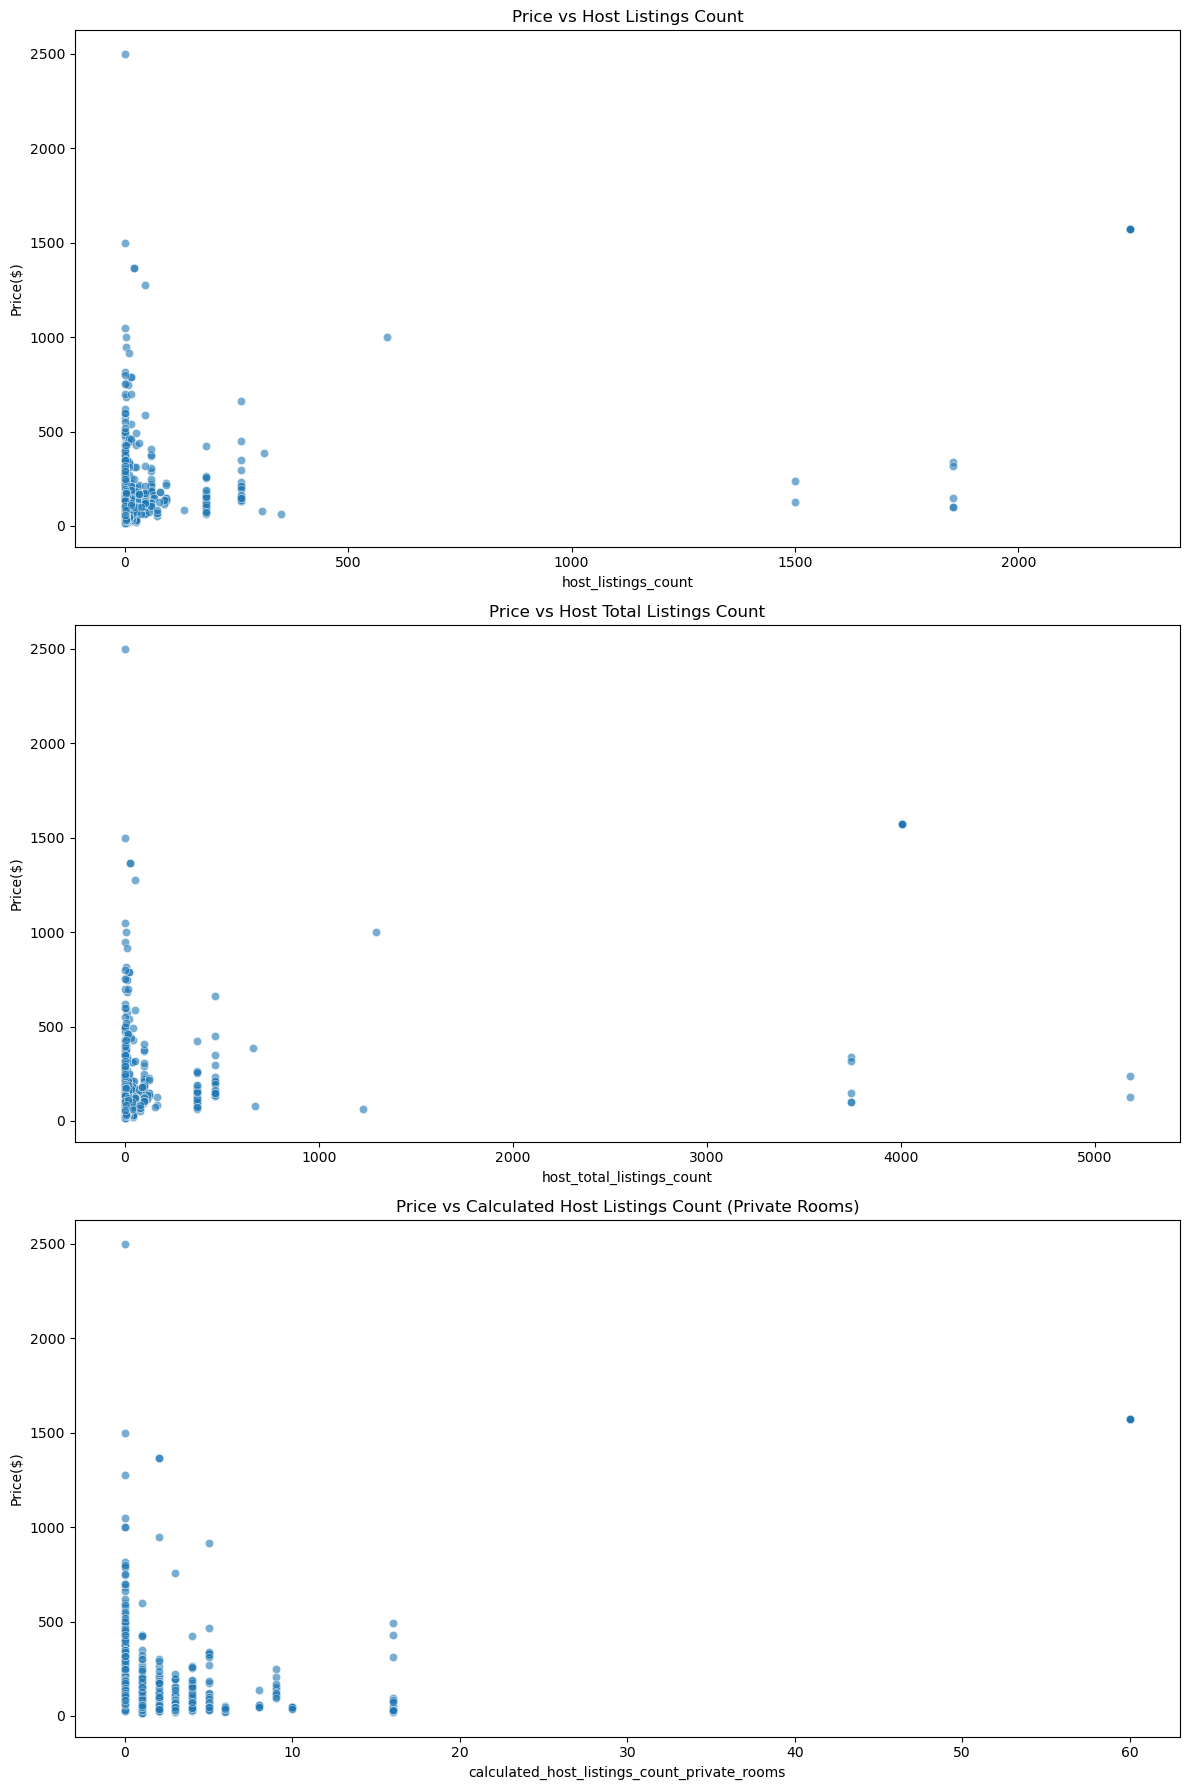

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(nrows=3, figsize=(12, 18))
variables = ['host_listings_count', 'host_total_listings_count','calculated_host_listings_count_private_rooms']
titles = ['Price vs Host Listings Count', 'Price vs Host Total Listings Count', 'Price vs Calculated Host Listings Count (Private Rooms)']

for i, var in enumerate(variables):
    sns.scatterplot(data=data, x=var, y='price', ax=axs[i], alpha=0.6)
    axs[i].set_title(titles[i])
    axs[i].set_ylabel('Price($)')
    axs[i].set_xlabel(var)
    
plt.tight_layout()
plt.show()

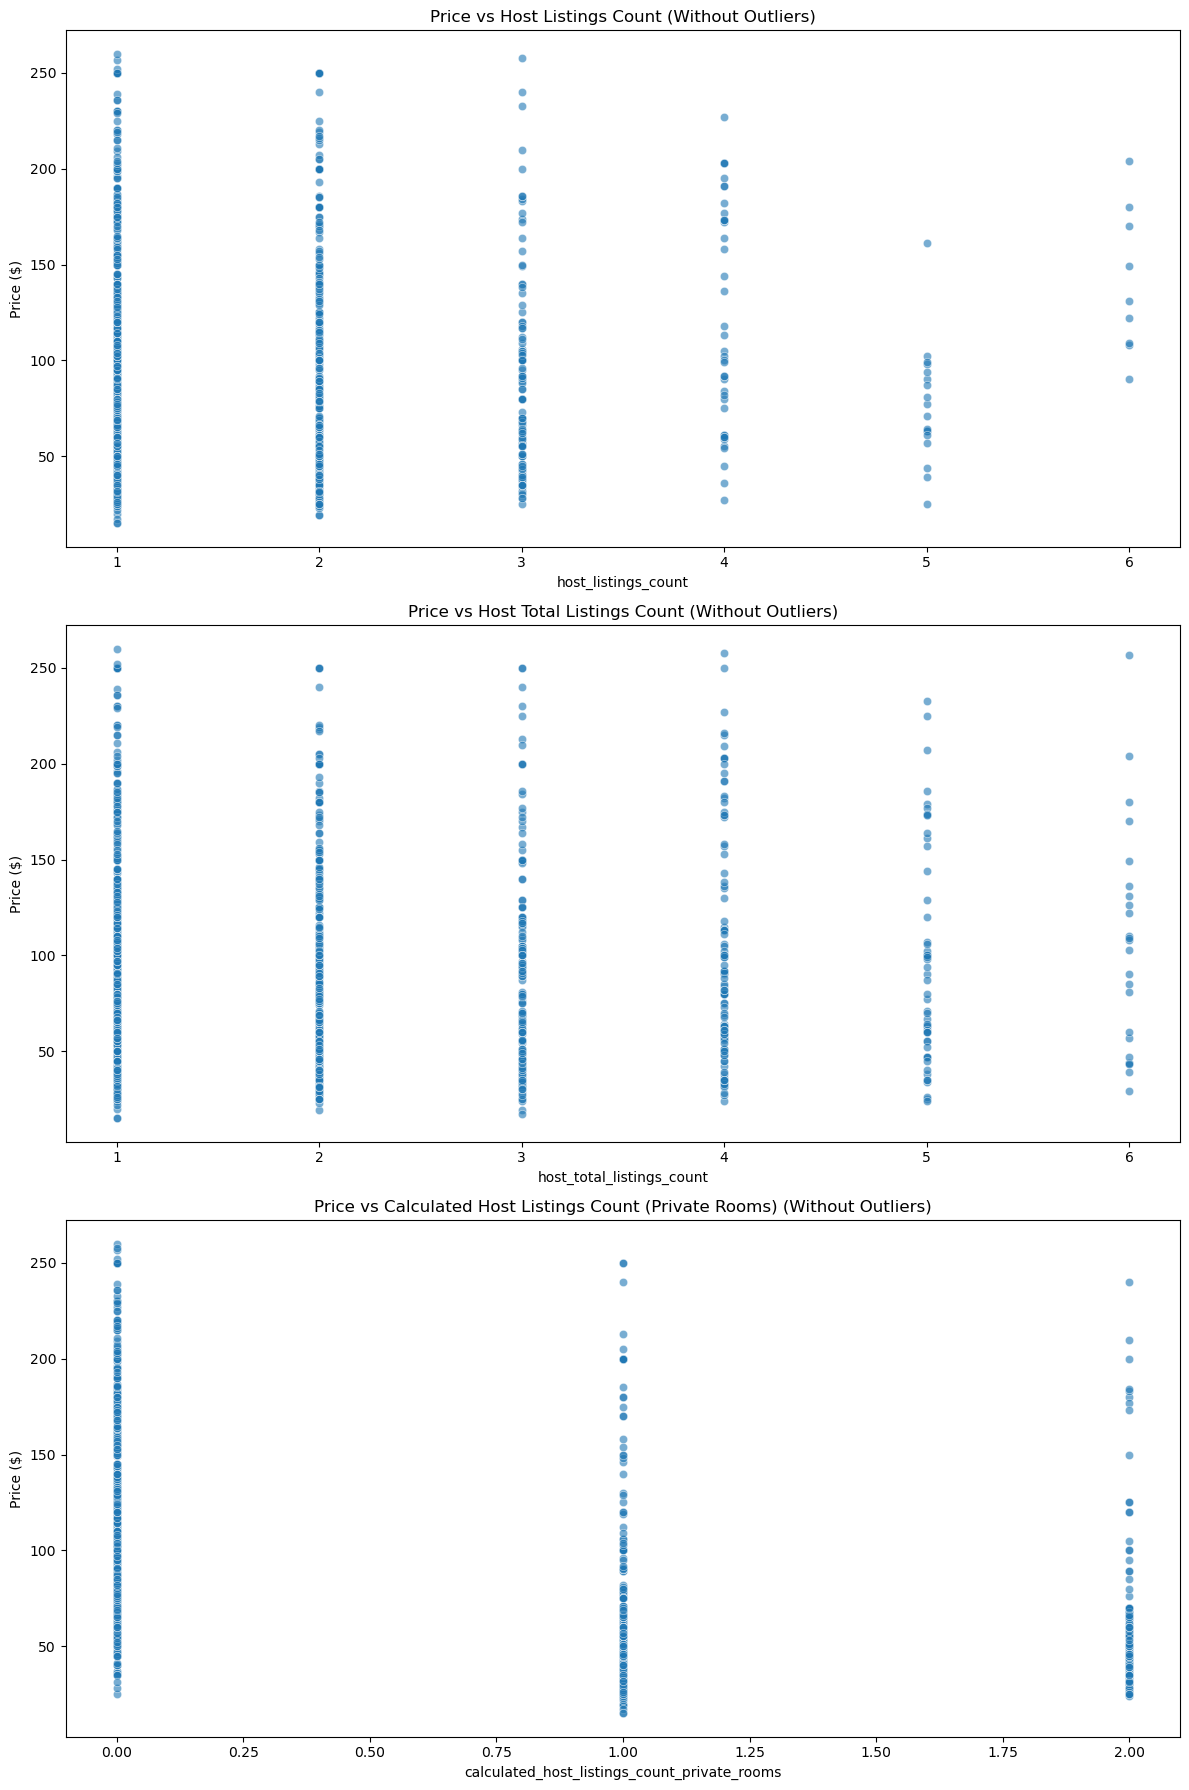

In [19]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for the specified columns
columns_to_clean = ['price', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count_private_rooms']
cleaned_data = data.copy()
for col in columns_to_clean:
    cleaned_data = remove_outliers(cleaned_data, col)

# Plot scatter plots for the cleaned data
fig, axs = plt.subplots(nrows=3, figsize=(12, 18))
for i, var in enumerate(variables):
    sns.scatterplot(data=cleaned_data, x=var, y='price', ax=axs[i], alpha=0.6)
    axs[i].set_title(titles[i] + " (Without Outliers)")
    axs[i].set_ylabel('Price ($)')
    axs[i].set_xlabel(var)

# Adjust layout
plt.tight_layout()
plt.show()
